# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [163]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [164]:
def f(r):
    '''Function to be minimised'''
    (x, y) = r
    # YOUR CODE HERE
    return (1-x)**2+100*(y-x**2)**2
    
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    difdirx = 2*(200*x**3-200*x*y+x-1)
    difdiry = 200*(y-x**2)
    return numpy.array([difdirx, difdiry])
    # YOUR CODE HERE
print(grad(numpy.array([1, 4]))[0])

-1200


Before proceeding, ensure that your functions have been written correctly:

In [165]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [166]:
def gradientDescent(df, r0, eta, nstep):
    x, y = r0
    history = numpy.empty( (nstep+1, 2) )
    Int = r0
    history[0] = Int
    for i in range(1, nstep+1):
        #(x, y) = history[i]
        #history[i] = r0
        #x = x - eta*grad(r0)[0]#dividing a number by a list
        #y = y - eta*grad(r0)[1]
        #r0 = [x, y]
        new = Int - eta*df(Int)
        history[i] = new
        Int = new
    return history
    
        
    # YOUR CODE HERE
    #xiplus1 = xi - (function(xi)-grad(xi))
    
    #return history

Test your answer:

In [167]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

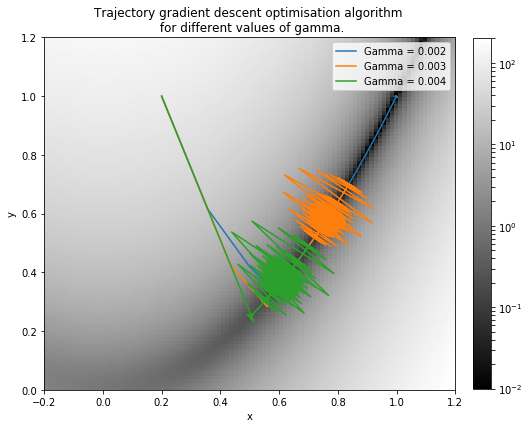

In [173]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys): 
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)
xval = []
yval = []
xval2 = []
yval2 = []
xval3 = []
yval3 = []
# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out n
r0 = numpy.array([0.2, 1])  # Initial seed point
Num1 = gradientDescent(grad, r0, 0.002, 50000)
Num2 = gradientDescent(grad, r0, 0.003, 50000)
Num3 = gradientDescent(grad, r0, 0.004, 50000)
Num1x = Num1[:, 0]
Num1y = Num1[:, 1]
Num2x = Num2[:, 0]
Num2y = Num2[:, 1]
Num3x = Num3[:, 0]
Num3y = Num3[:, 1]
plt.plot(Num1x, Num1y, label = 'Gamma = 0.002')
plt.plot(Num2x, Num2y, label = 'Gamma = 0.003')
plt.plot(Num3x, Num3y, label = 'Gamma = 0.004')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory gradient descent optimisation algorithm \n for different values of gamma.')
plt.legend()

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

When gamma = 0.002 convergence occurs slowly, however there is not any noticeable oscillation. For gamma = 0.004 and gamma = 0.003, convergence is reached relatively quicker, but after it's reached the trajectory starts oscillating. Gamma = 0.002 is the best step size, eventhough convergence is slower, for the larger amount of steps you have a more accurate result.